1. Выбрать один или несколько наборов данных (датасетов) для
решения следующих задач. Каждая задача может быть решена на
отдельном датасете, или несколько задач могут быть решены на
одном датасете. Просьба не использовать датасет, на котором данная
задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций
решить следующие задачи:
a. масштабирование признаков (не менее чем тремя способами);
b. обработку выбросов для числовых признаков (по одному
способу для удаления выбросов и для замены выбросов);
c. обработку по крайней мере одного нестандартного признака
(который не является числовым или категориальным);
d. отбор признаков:
i. один метод из группы методов фильтрации (filter
methods);
ii. один метод из группы методов обертывания (wrapper
methods);
iii. один метод из группы методов вложений (embedded
methods).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from datetime import datetime
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from operator import itemgetter

In [ ]:
data = pd.read_csv('SolarPrediction.csv')
data.shape

(32686, 11)

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
# Нужно ли масштабирование
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Radiation', axis=1)

In [ ]:
numerical_columns = X_ALL.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.tolist()
numerical_columns

['UNIXTime',
 'Temperature',
 'Pressure',
 'Humidity',
 'WindDirection(Degrees)',
 'Speed']

In [ ]:
X_ALL = X_ALL[numerical_columns]

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Radiation'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((26148, 6), (6538, 6))

## Масштабирование признаков

### Масштабирование данных на основе Z-оценки

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,-0.937753,-0.500439,0.678974,-0.616253,0.407620,-0.178738
1,-0.937854,-0.500439,0.678974,-0.654730,0.400285,-0.823359
2,-0.937953,-0.500439,0.678974,-0.693206,0.183490,-0.823359
3,-0.938054,-0.500439,0.678974,-0.577776,-0.069497,-0.823359
4,-0.938153,-0.500439,0.678974,-0.500823,-0.463407,-0.178738
...,...,...,...,...,...,...
32681,0.845373,-1.145490,0.130250,1.038241,0.023209,0.145006
32682,0.845273,-1.145490,-0.052658,1.038241,-0.309138,0.145006
32683,0.845173,-1.145490,-0.052658,1.038241,0.020443,0.789627
32684,0.845073,-1.145490,-0.052658,0.999764,0.248901,0.465884


In [ ]:
data_cs11_scaled.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04
mean,-2.326187e-14,5.565041e-16,2.904952e-14,1.391260e-17,6.956302e-17,-9.738822e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.771472e+00,-2.758117e+00,-4.259540e+00,-2.578560e+00,-1.724255e+00,-1.788859e+00
25%,-8.322047e-01,-8.229646e-01,-4.184734e-01,-7.316829e-01,-7.366250e-01,-8.233591e-01
50%,-7.053415e-03,-1.779139e-01,1.302504e-01,3.841386e-01,5.062367e-02,-1.787376e-01
75%,8.096075e-01,6.283995e-01,6.789742e-01,8.458578e-01,4.307058e-01,4.658840e-01
max,1.736190e+00,3.208603e+00,2.508053e+00,1.076717e+00,2.602741e+00,9.814329e+00


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

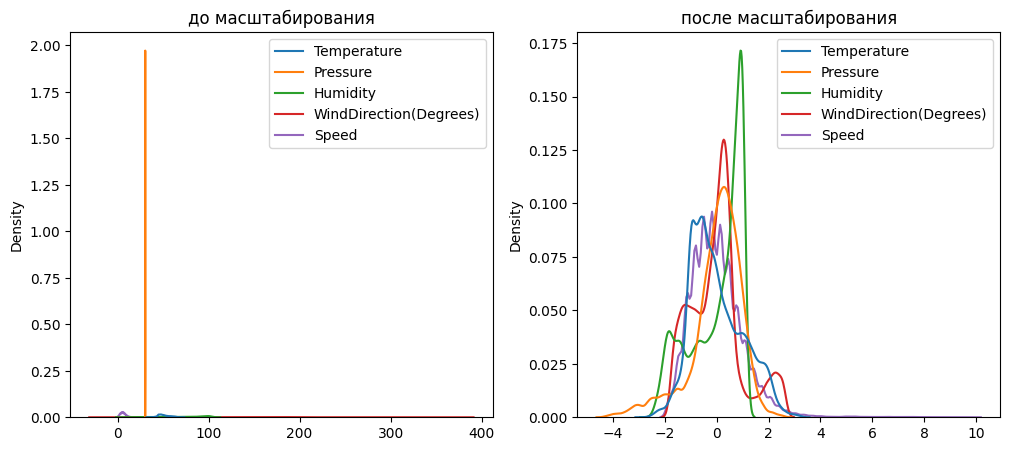

In [ ]:
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,2.614800e+04,2.614800e+04,2.614800e+04,2.614800e+04,2.614800e+04,2.614800e+04
mean,-9.170099e-15,-1.017322e-16,-8.554556e-14,-8.749991e-17,5.434777e-19,-3.032606e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.780906e+00,-2.755083e+00,-4.252031e+00,-2.564417e+00,-1.720121e+00,-1.788798e+00
25%,-8.328751e-01,-8.225912e-01,-4.166601e-01,-7.611631e-01,-7.438990e-01,-8.271931e-01
50%,-3.448157e-03,-1.784273e-01,1.312501e-01,3.898498e-01,5.231879e-02,-1.851718e-01
75%,8.428568e-01,6.267775e-01,6.791602e-01,8.502550e-01,4.337985e-01,4.568494e-01
max,1.733785e+00,3.203433e+00,2.505527e+00,1.080458e+00,2.608407e+00,9.767585e+00


In [ ]:
data_cs12_scaled_test.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000
mean,-0.029415,-0.003790,0.005963,0.034018,0.023719,-0.035772
std,1.009996,0.993177,0.992626,0.985295,1.001620,0.979220
min,-1.781006,-2.433001,-4.252031,-2.410948,-1.720001,-1.788798
25%,-0.867040,-0.661550,-0.416660,-0.646062,-0.684960,-0.827193
50%,-0.058420,-0.178427,0.131250,0.428217,0.068497,-0.185172
75%,0.796289,0.626778,0.679160,0.888622,0.444414,0.456849
max,1.733885,3.203433,2.505527,1.080458,2.608287,7.841521


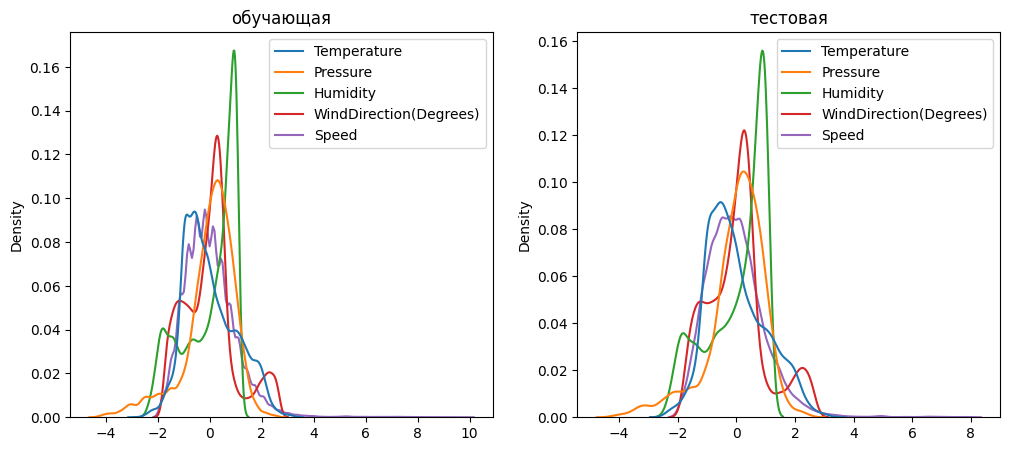

In [ ]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

### Масштабирование "Mean Normalisation"

In [ ]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,-0.001674,-0.000127,0.000177,0.001867,0.001096,-0.000619
std,0.285111,0.167599,0.147765,0.273581,0.231111,0.086185
min,-0.506732,-0.462377,-0.629226,-0.703568,-0.397392,-0.154789
25%,-0.238941,-0.138053,-0.061658,-0.198305,-0.169143,-0.071579
50%,-0.003685,-0.029945,0.019423,0.106958,0.012796,-0.016023
75%,0.229150,0.105190,0.100504,0.233274,0.100635,0.039532
max,0.493325,0.537623,0.370774,0.296432,0.602608,0.845211


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [ ]:
data_cs22_scaled_train.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,2.614800e+04,2.614800e+04,2.614800e+04,2.614800e+04,2.614800e+04,2.614800e+04
mean,-2.608982e-15,-1.753565e-17,-1.265923e-14,-2.486410e-17,6.793471e-19,-2.511886e-17
std,2.845255e-01,1.678302e-01,1.479853e-01,2.743631e-01,2.310298e-01,8.653392e-02
min,-5.067033e-01,-4.623774e-01,-6.292259e-01,-7.035679e-01,-3.973917e-01,-1.547888e-01
25%,-2.369696e-01,-1.380530e-01,-6.165838e-02,-2.088311e-01,-1.718596e-01,-7.157889e-02
50%,-9.810698e-04,-2.994493e-02,1.942270e-02,1.069584e-01,1.208697e-02,-1.602334e-02
75%,2.398096e-01,1.051902e-01,1.005038e-01,2.332742e-01,1.002185e-01,3.953222e-02
max,4.932967e-01,5.376226e-01,3.707741e-01,2.964321e-01,6.026083e-01,8.452112e-01


In [ ]:
data_cs22_scaled_test.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000
mean,-0.008369,-0.000636,0.000882,0.009333,0.005480,-0.003095
std,0.287364,0.166682,0.146891,0.270324,0.231400,0.084734
min,-0.506732,-0.408323,-0.629226,-0.661463,-0.397364,-0.154789
25%,-0.246690,-0.111026,-0.061658,-0.177252,-0.158243,-0.071579
50%,-0.016622,-0.029945,0.019423,0.117485,0.015825,-0.016023
75%,0.226560,0.105190,0.100504,0.243800,0.102671,0.039532
max,0.493325,0.537623,0.370774,0.296432,0.602580,0.678545


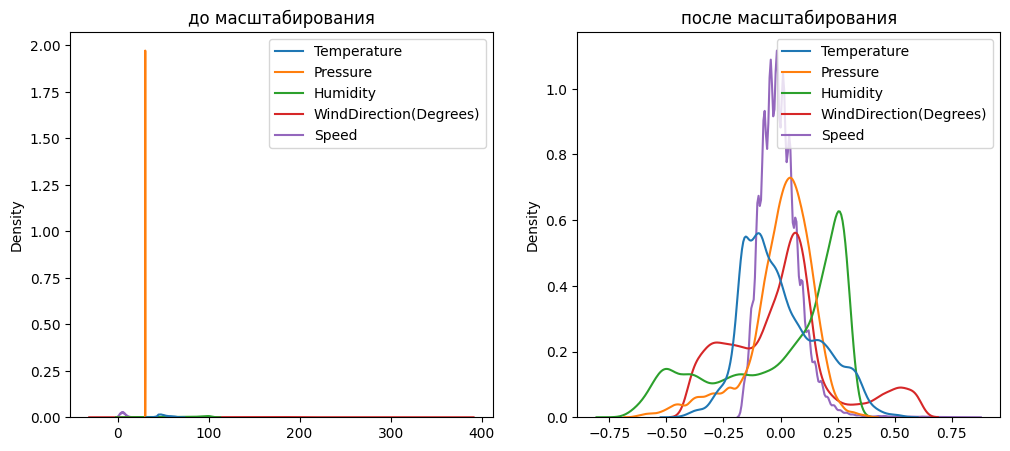

In [ ]:
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

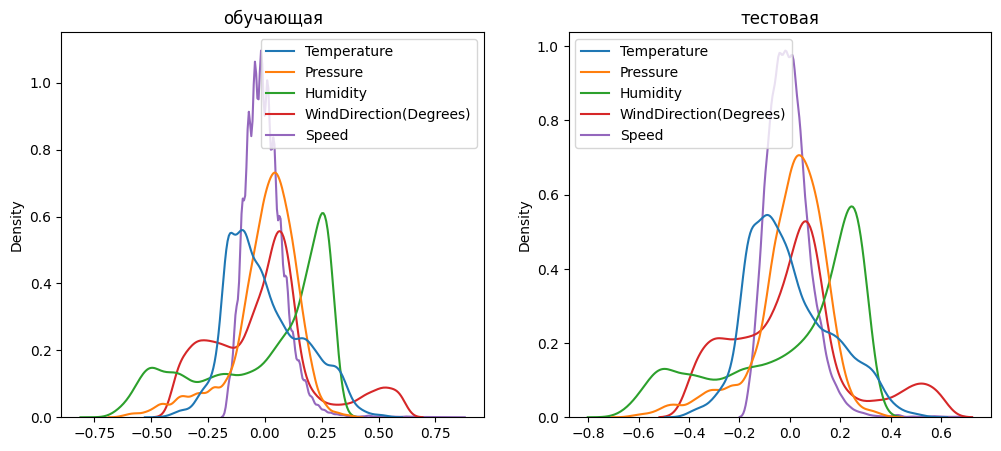

In [ ]:
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax-масштабирование

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,0.505029,0.462250,0.629402,0.705435,0.398488,0.154170
std,0.285095,0.167599,0.147765,0.273581,0.231111,0.086185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.267776,0.324324,0.567568,0.505263,0.228248,0.083210
50%,0.503018,0.432432,0.648649,0.810526,0.410187,0.138765
75%,0.735840,0.567568,0.729730,0.936842,0.498027,0.194321
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

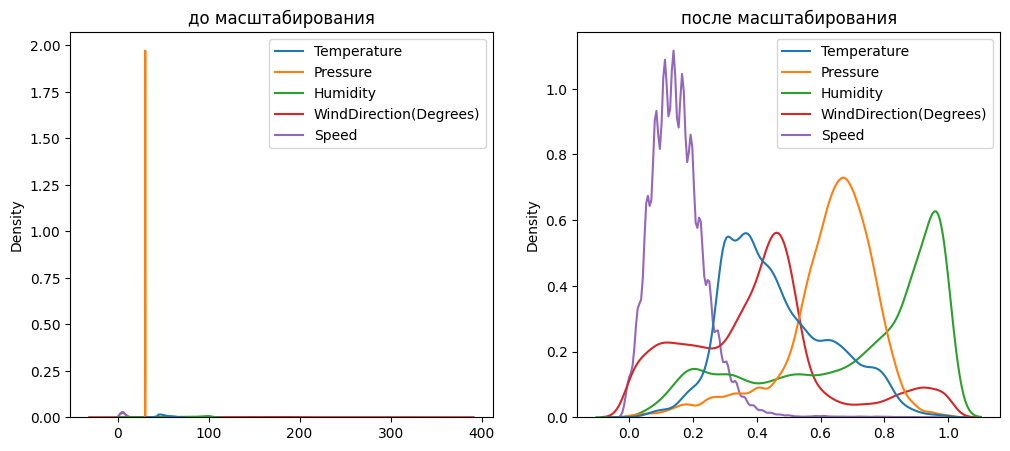

In [ ]:
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

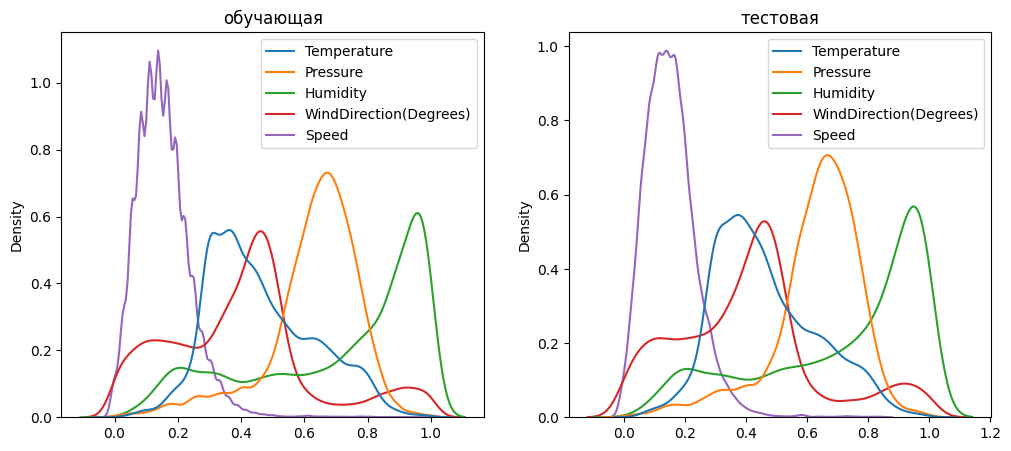

In [ ]:
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

### Масштабирование по медиане

In [ ]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,0.004296,0.122584,-0.118685,-0.243505,-0.043367,0.138638
std,0.609092,0.689017,0.911219,0.633908,0.856668,0.775661
min,-1.074677,-1.777778,-4.000000,-1.878049,-1.520459,-1.248889
25%,-0.502586,-0.444444,-0.500000,-0.707317,-0.674401,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.497414,0.555556,0.500000,0.292683,0.325599,0.500000
max,1.061780,2.333333,2.166667,0.439024,2.186285,7.751111


In [ ]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

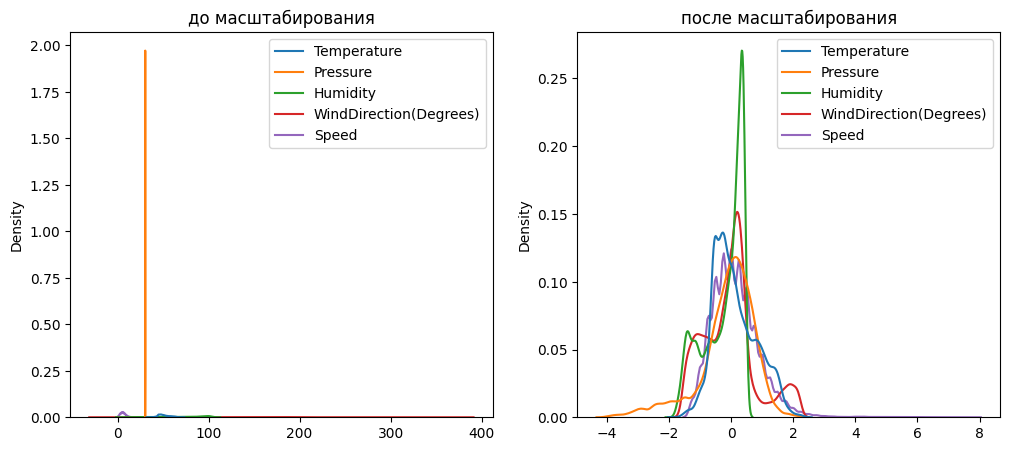

In [ ]:
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

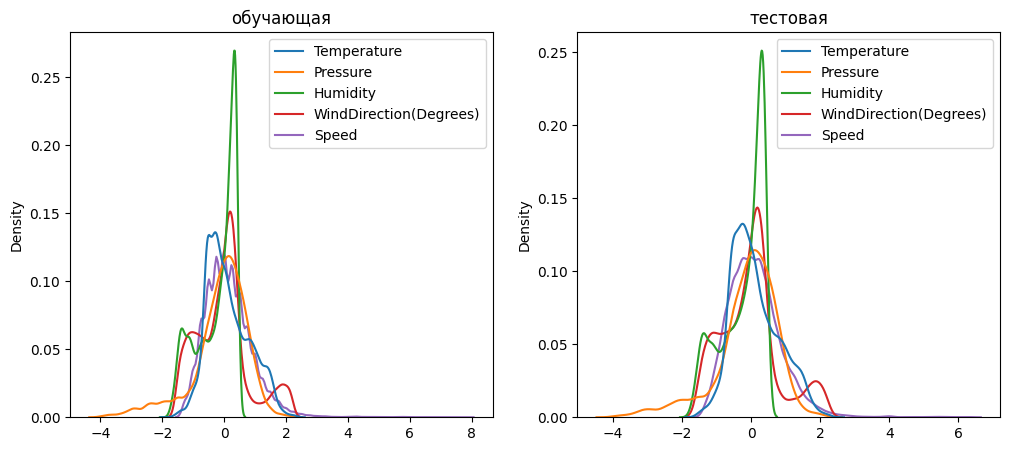

In [ ]:
draw_kde(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

## Обработка выбросов для числовых признаков

In [ ]:
x_col_list = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']

In [ ]:
data.shape

(32686, 11)

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


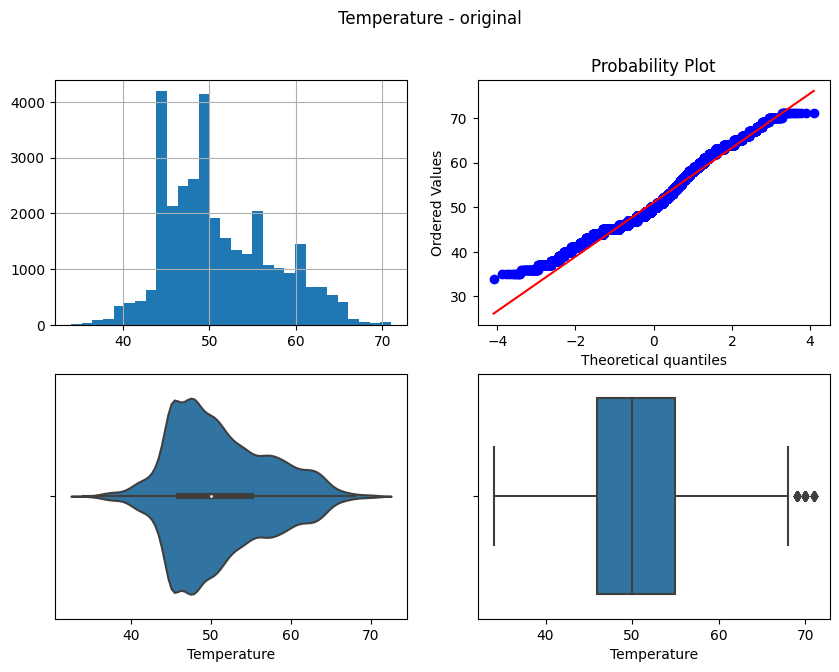

In [ ]:
diagnostic_plots(data, 'Temperature', 'Temperature - original')

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


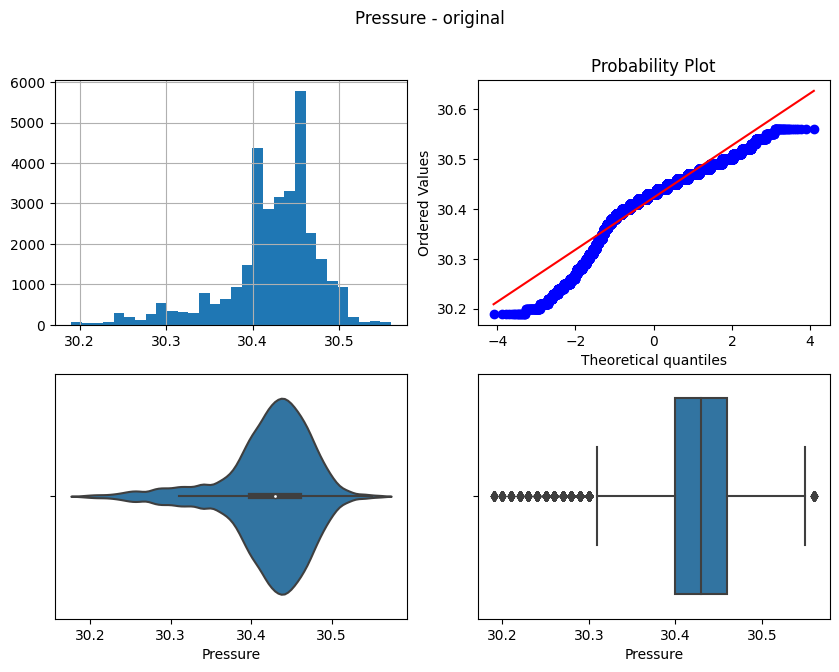

In [ ]:
diagnostic_plots(data, 'Pressure', 'Pressure - original')

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


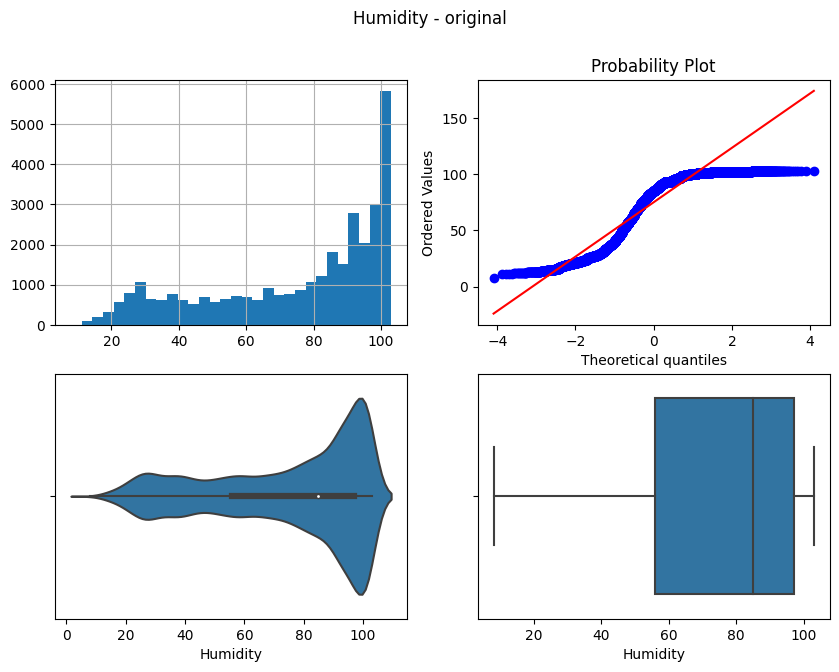

In [ ]:
diagnostic_plots(data, 'Humidity', 'Humidity - original')

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


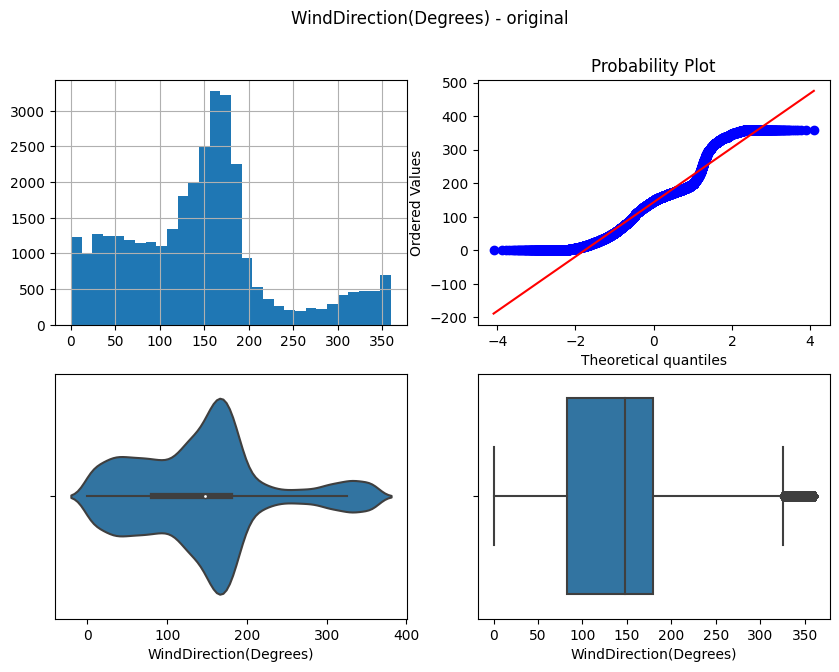

In [ ]:
diagnostic_plots(data, 'WindDirection(Degrees)', 'WindDirection(Degrees) - original')

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


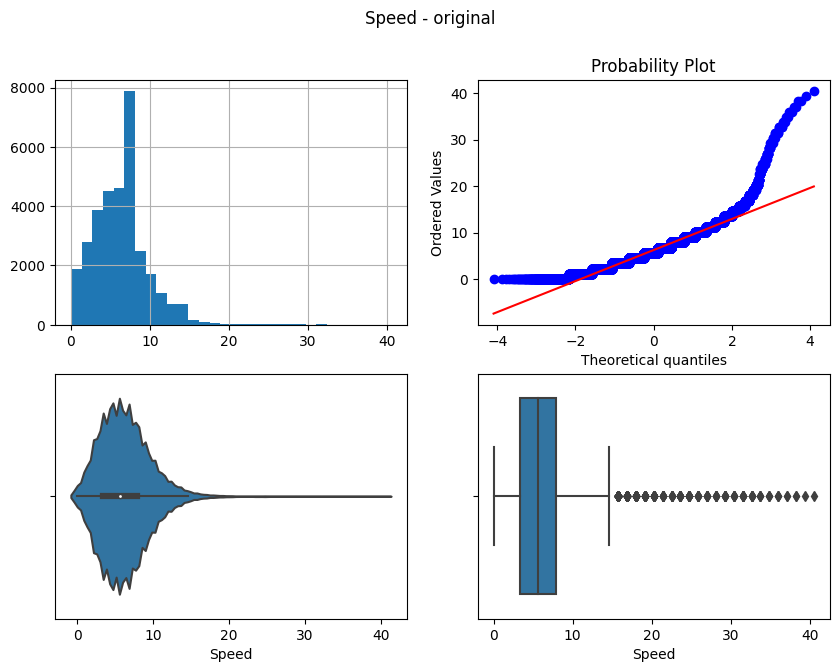

In [ ]:
diagnostic_plots(data, 'Speed', 'Speed - original')

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary

### Удаление выбросов

In [ ]:
data.shape

(32686, 11)

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


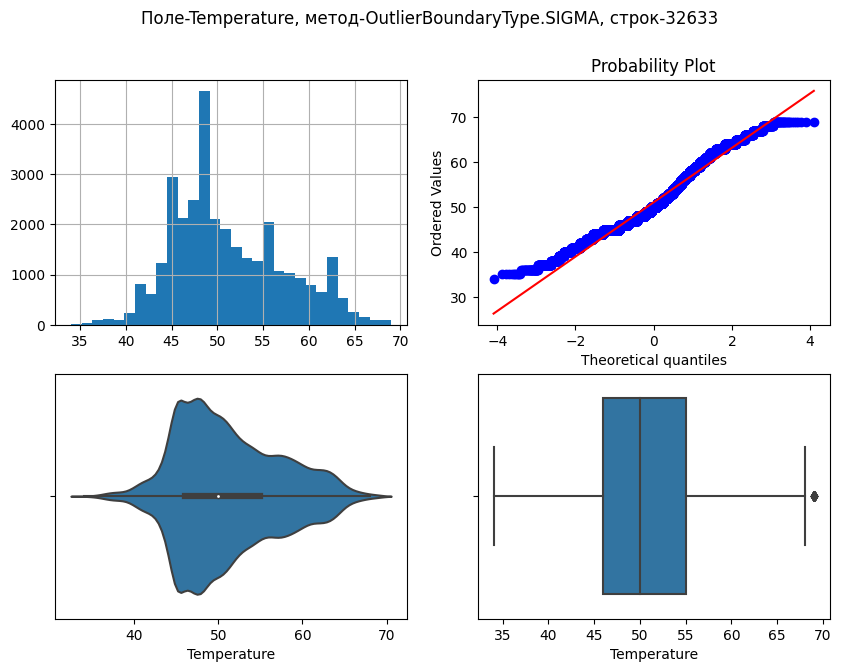

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


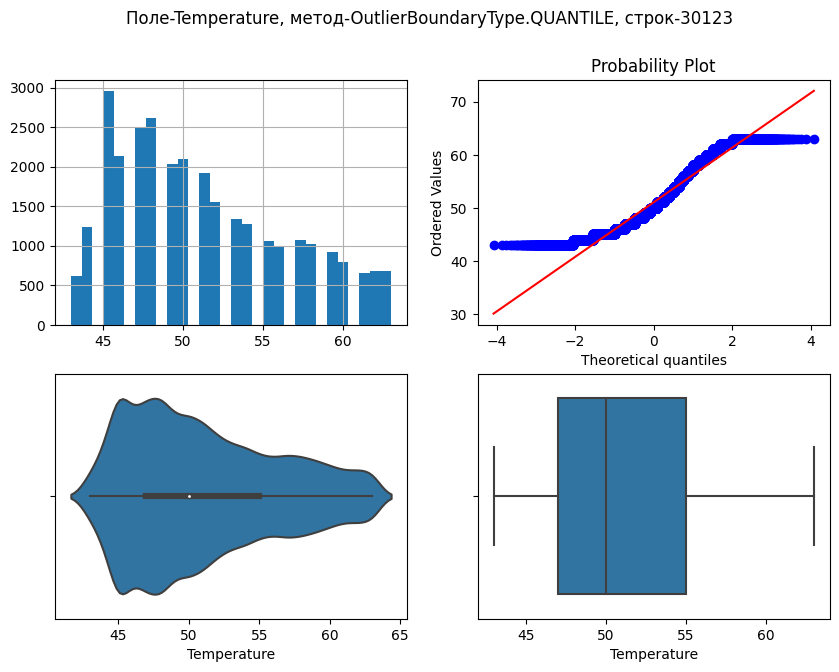

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


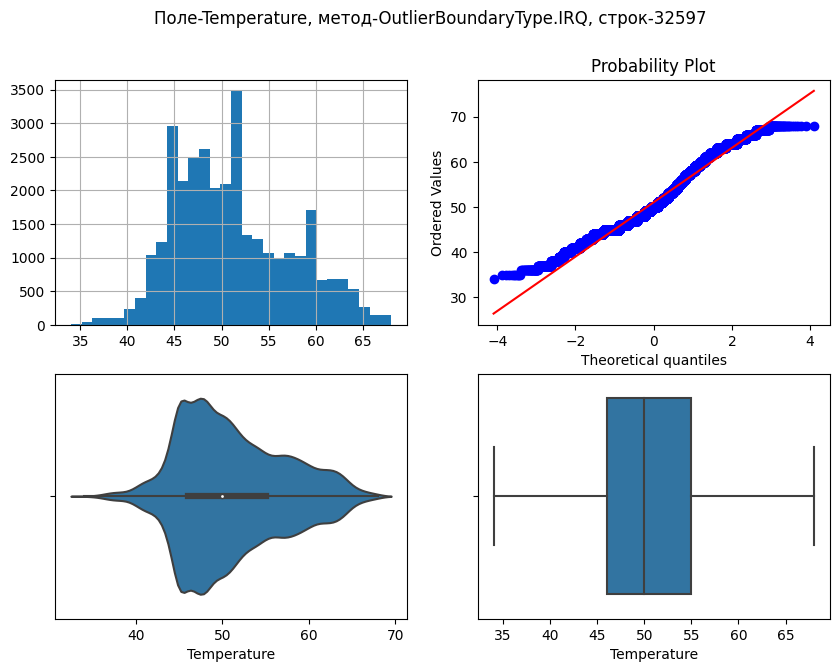

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


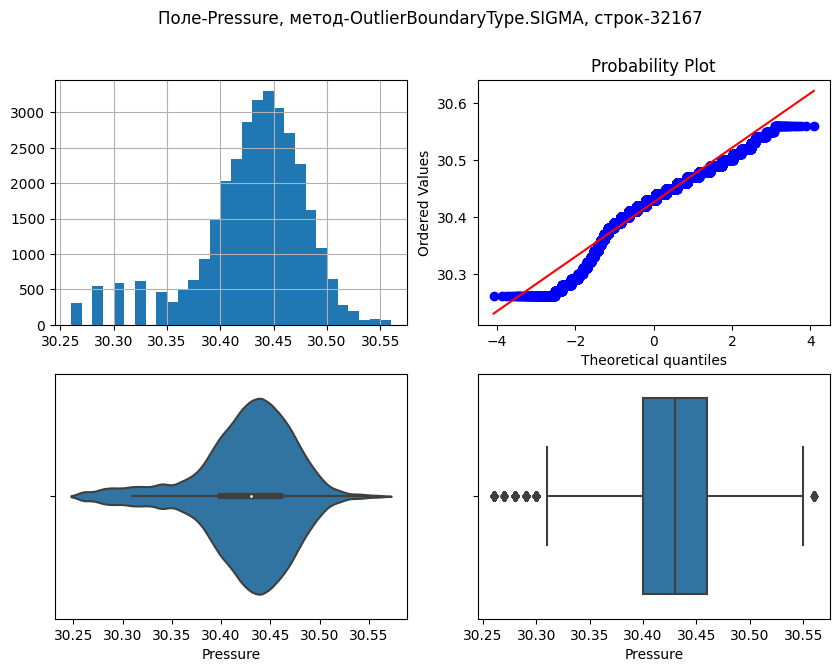

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


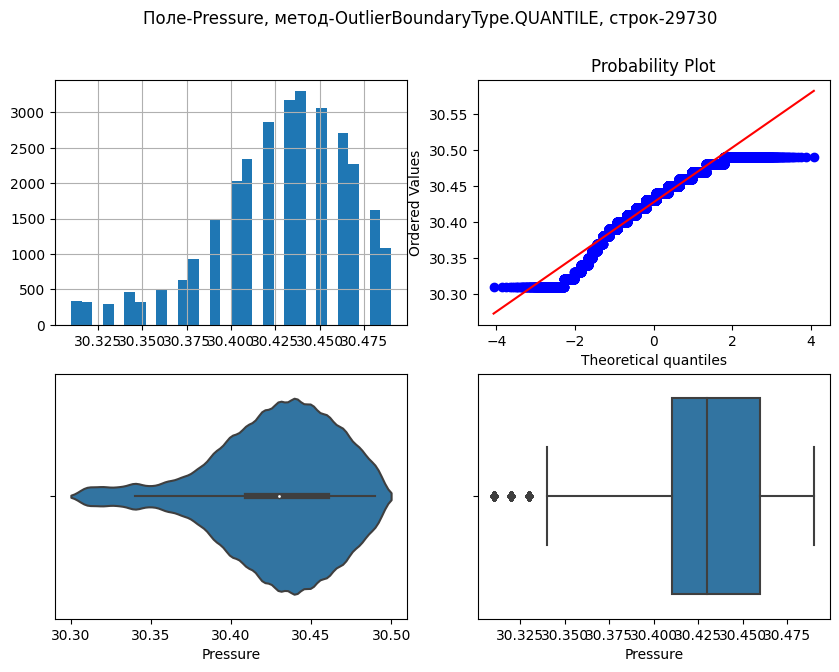

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


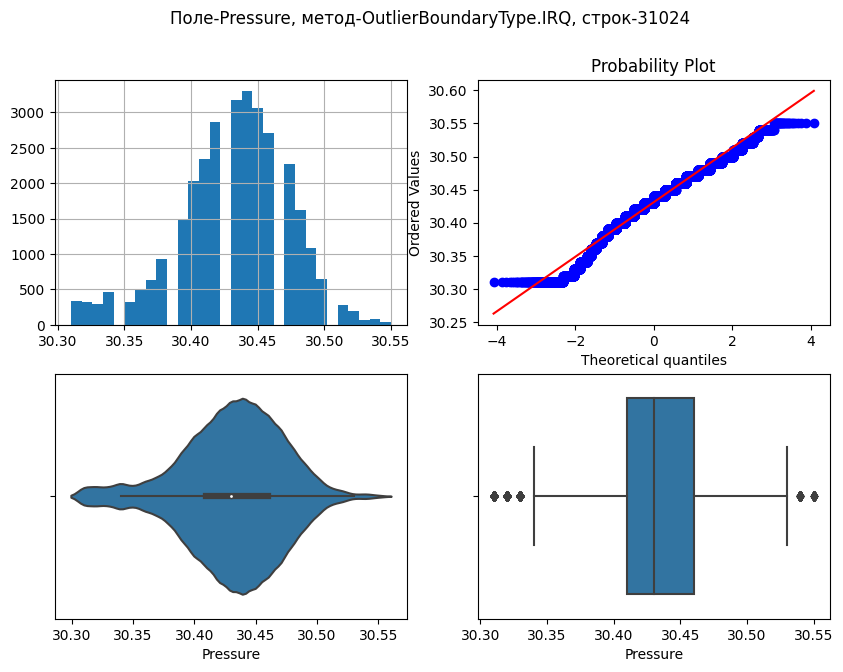

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


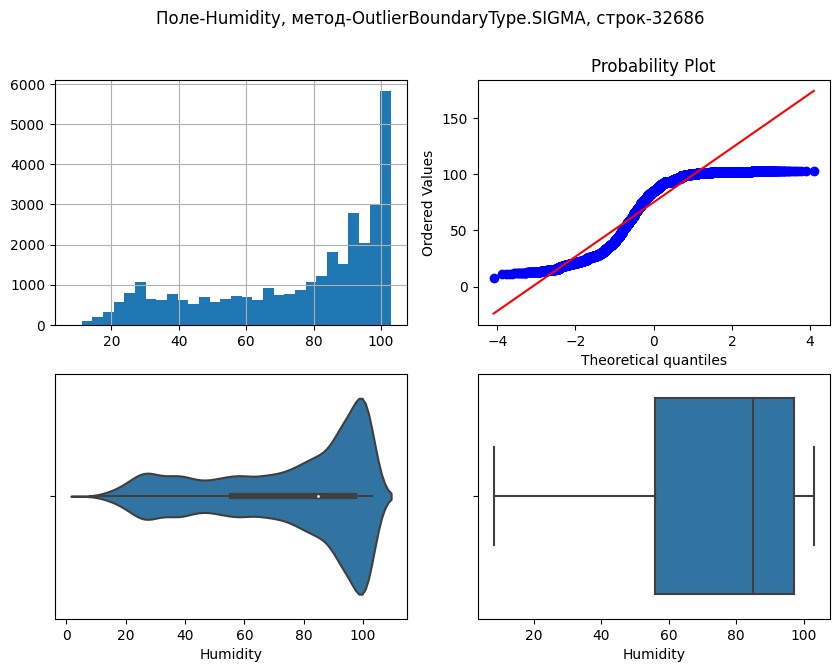

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


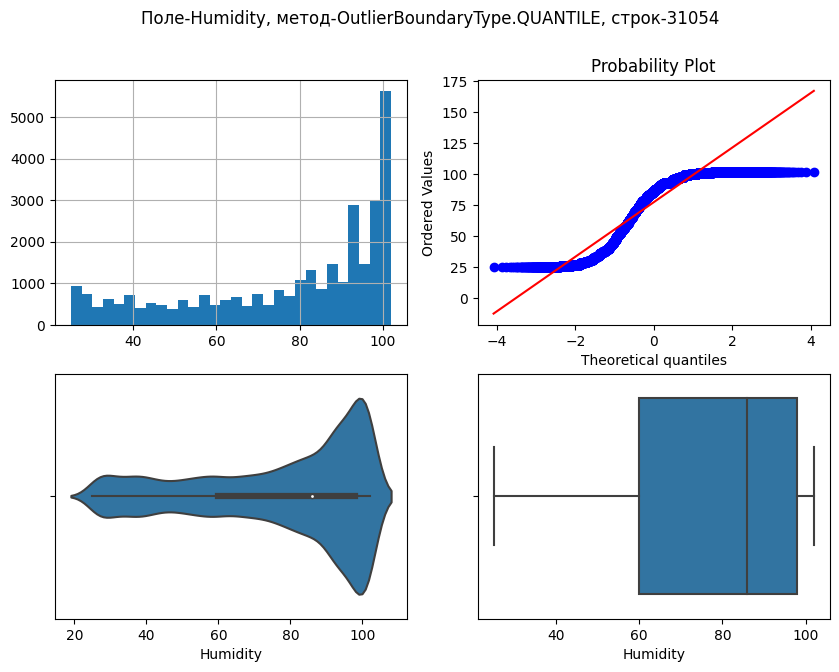

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


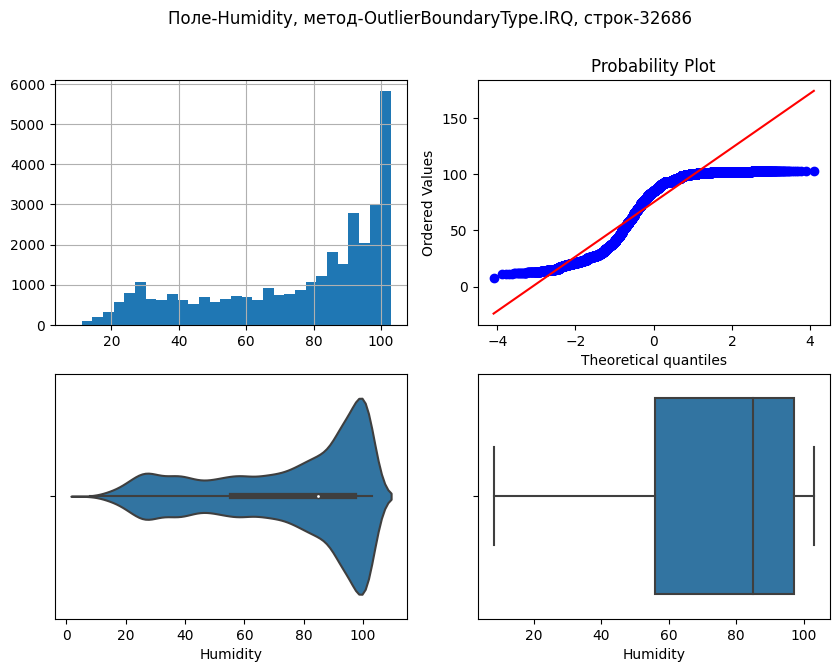

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


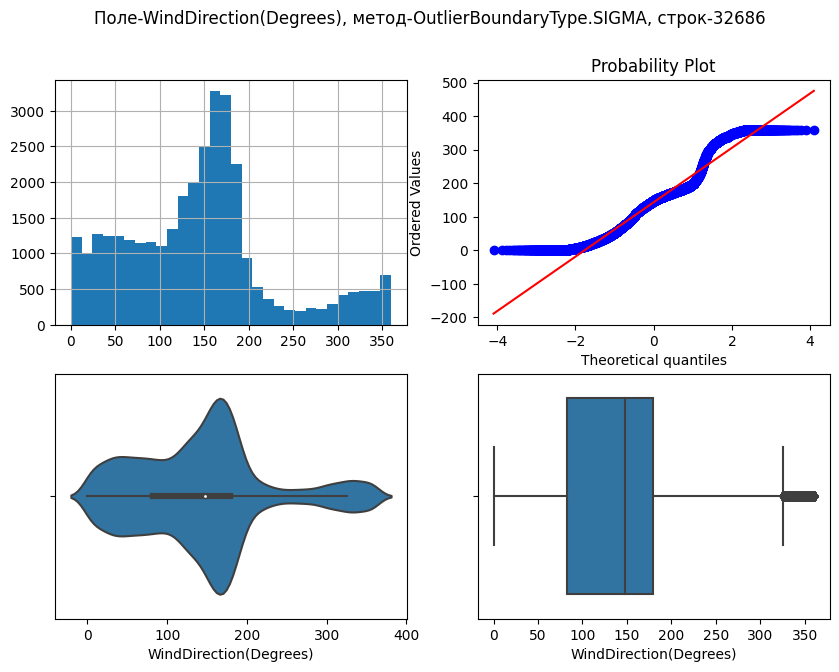

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


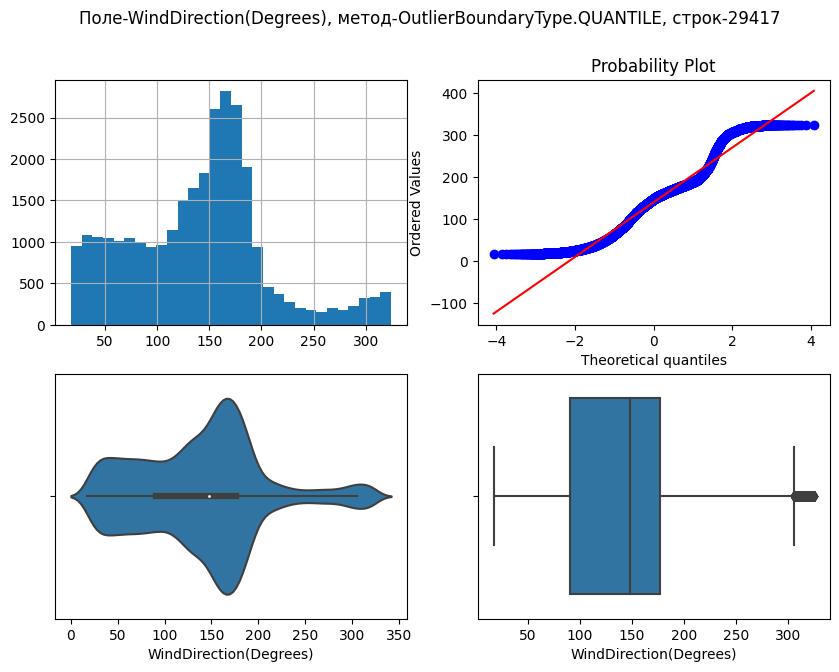

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


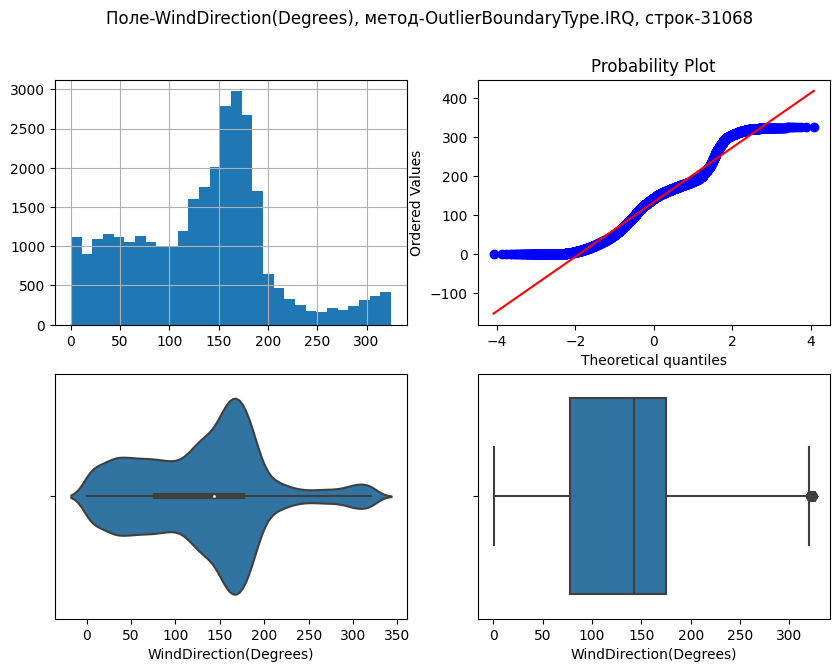

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


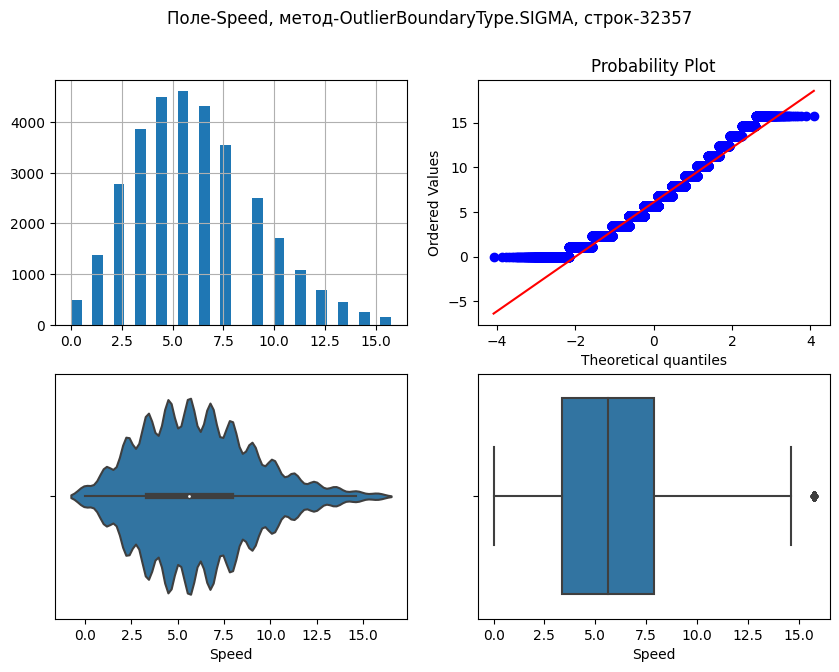

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


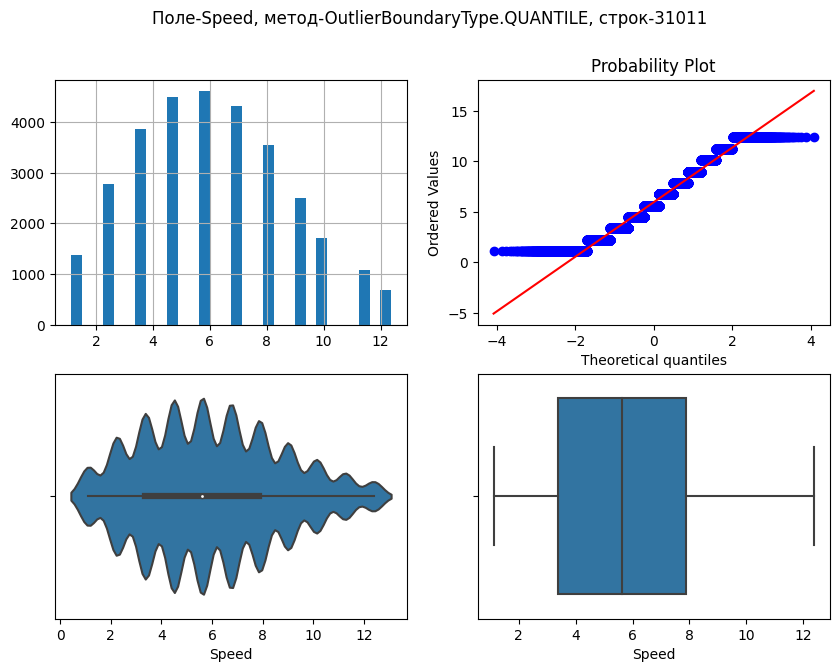

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


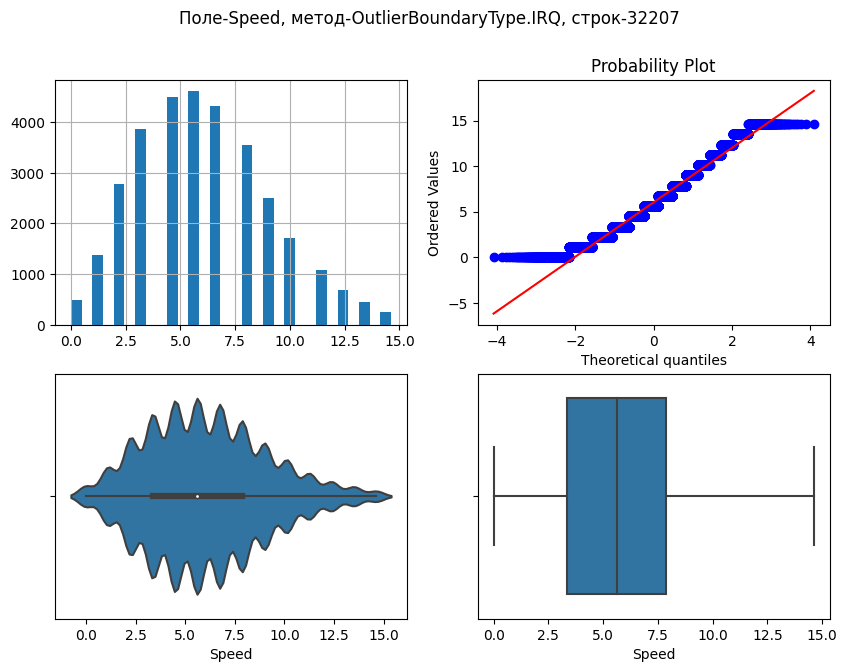

In [ ]:
for col in x_col_list:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### Замена выбросов

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


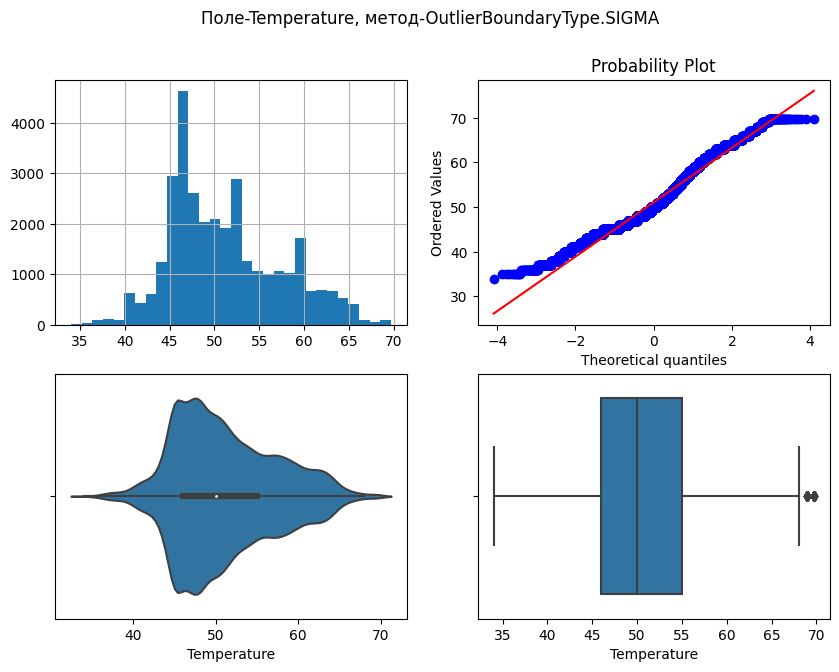

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


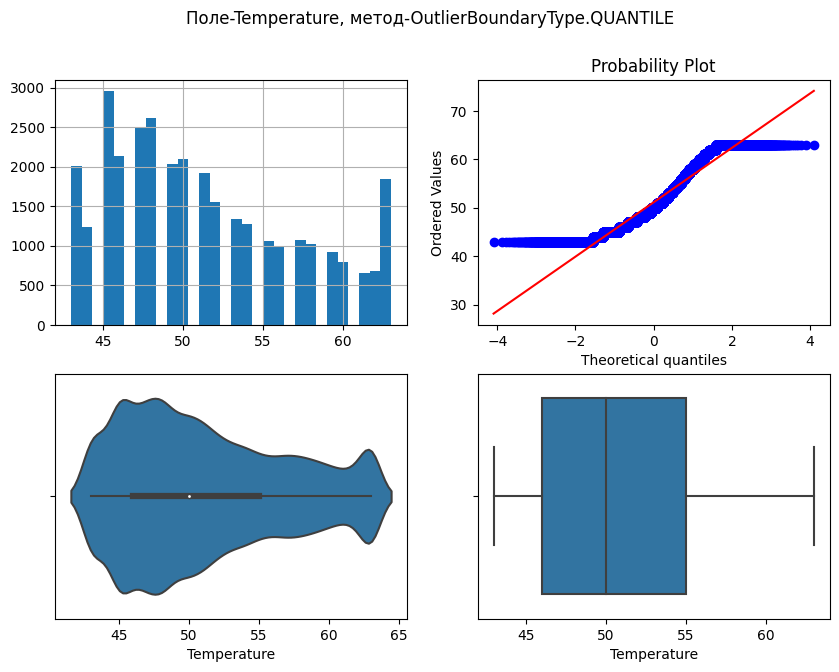

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


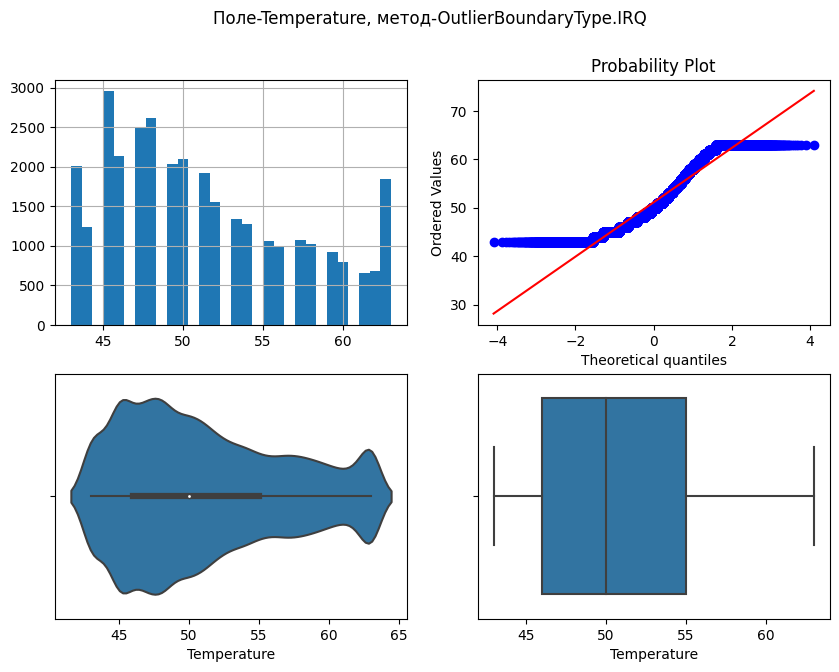

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


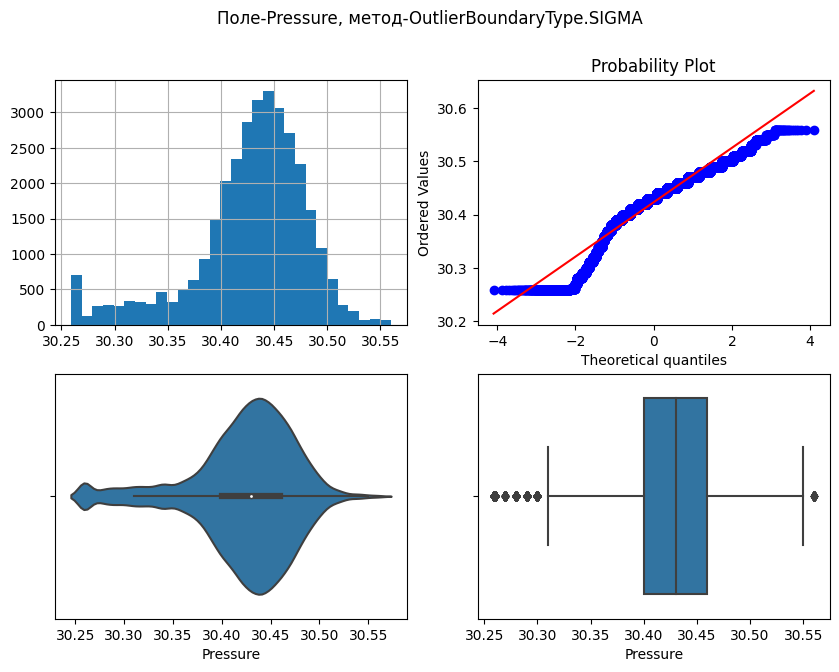

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


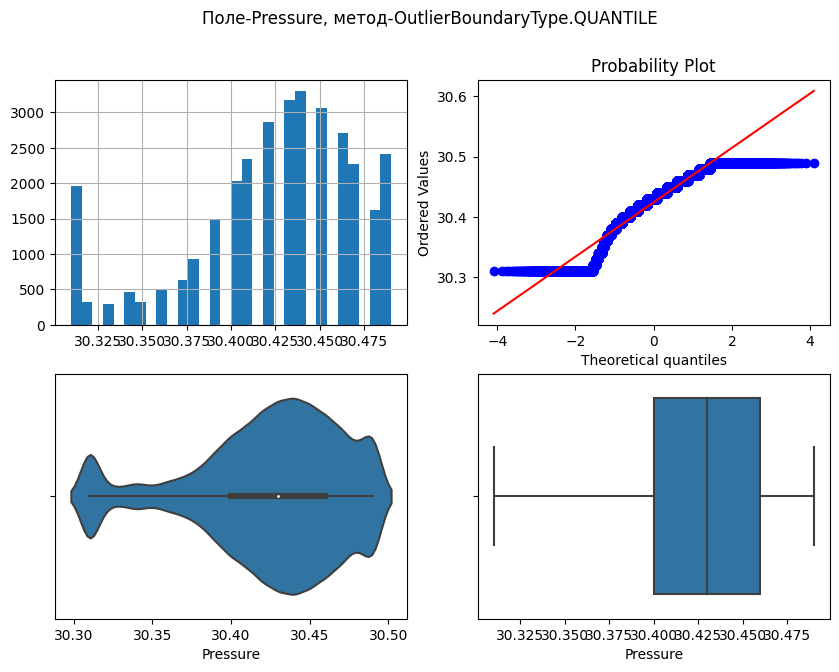

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


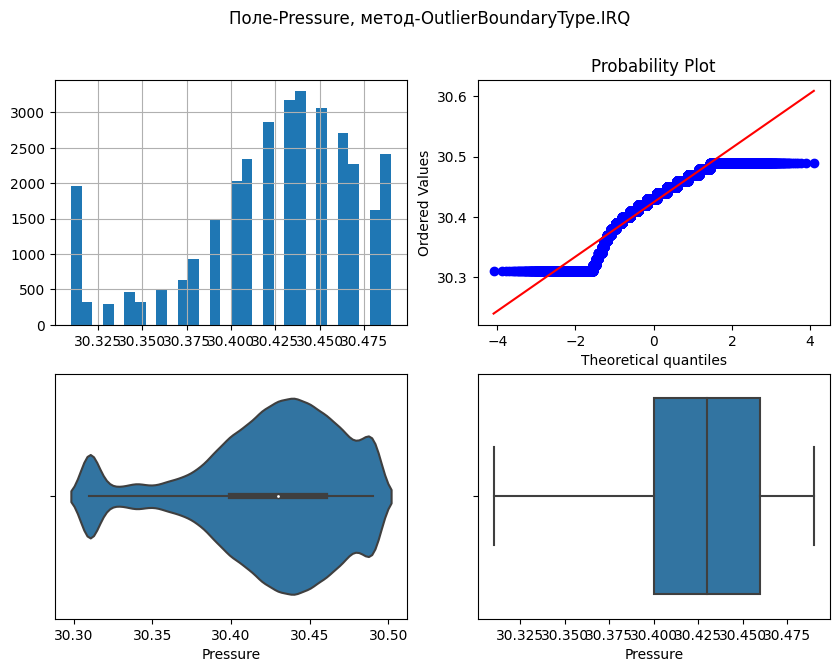

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


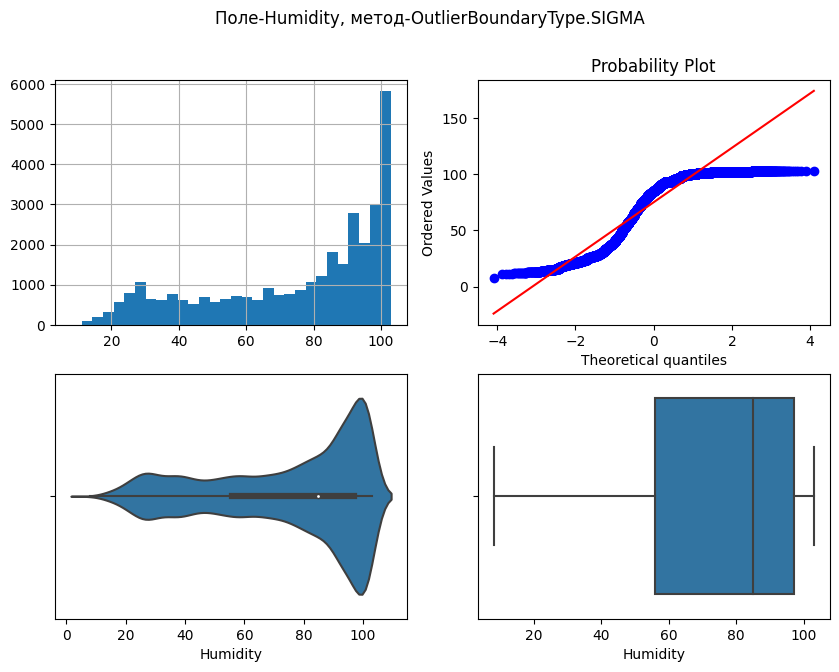

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


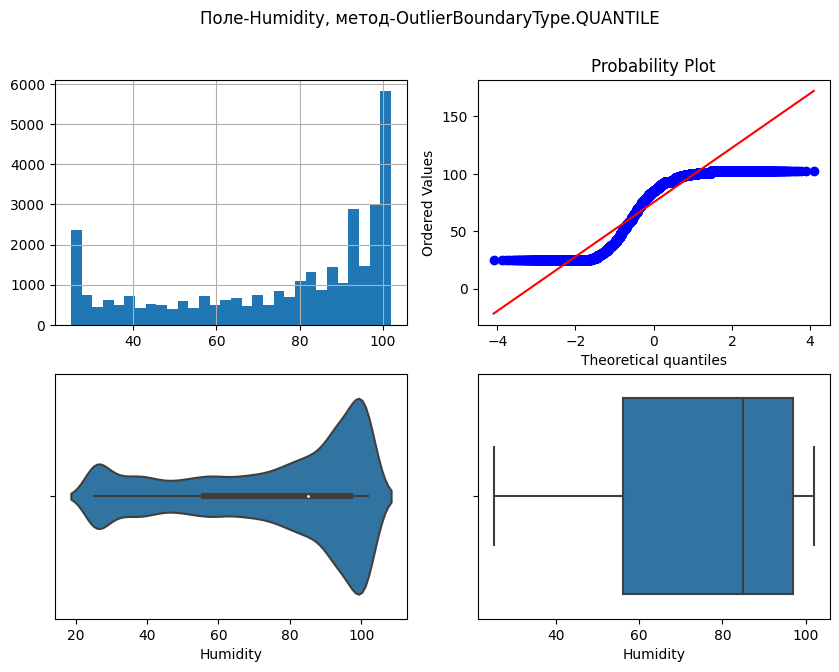

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


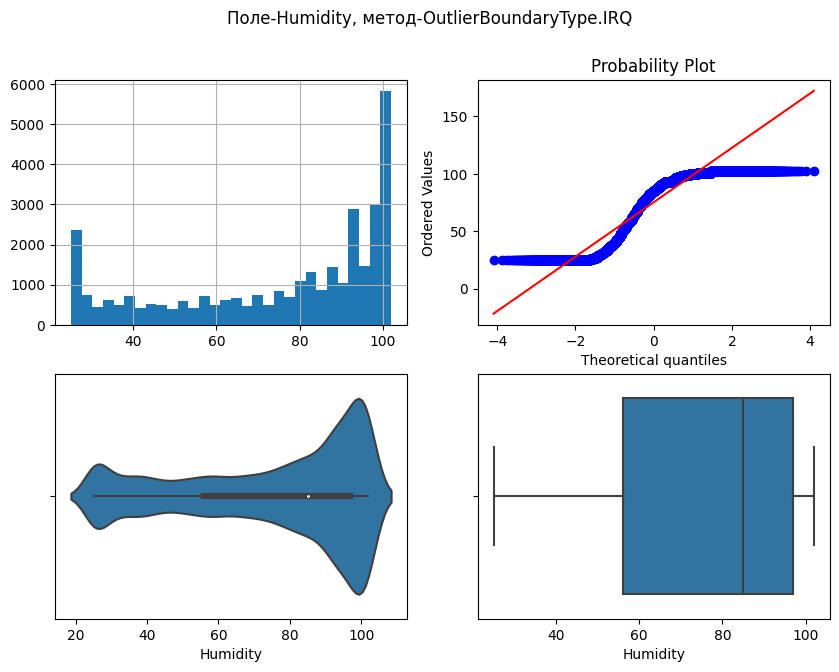

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


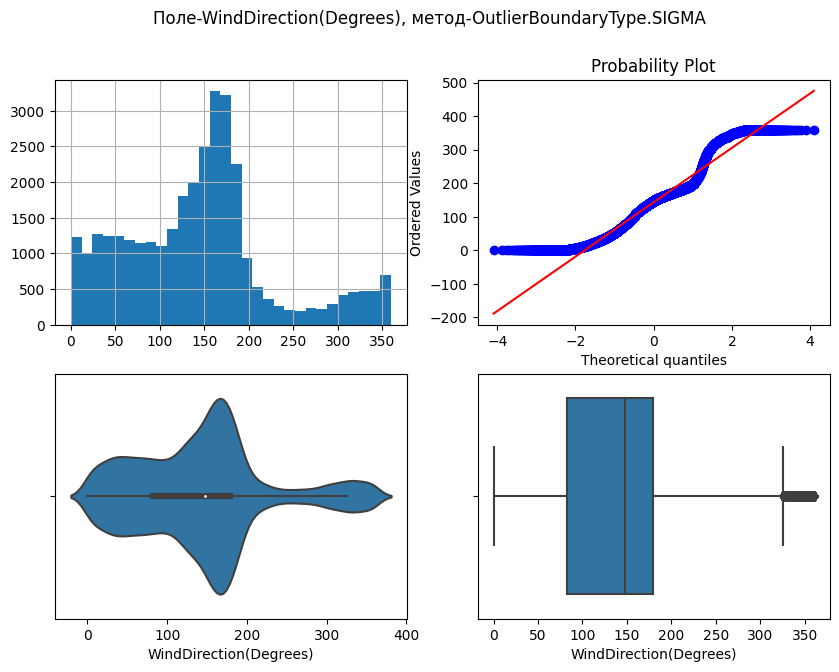

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


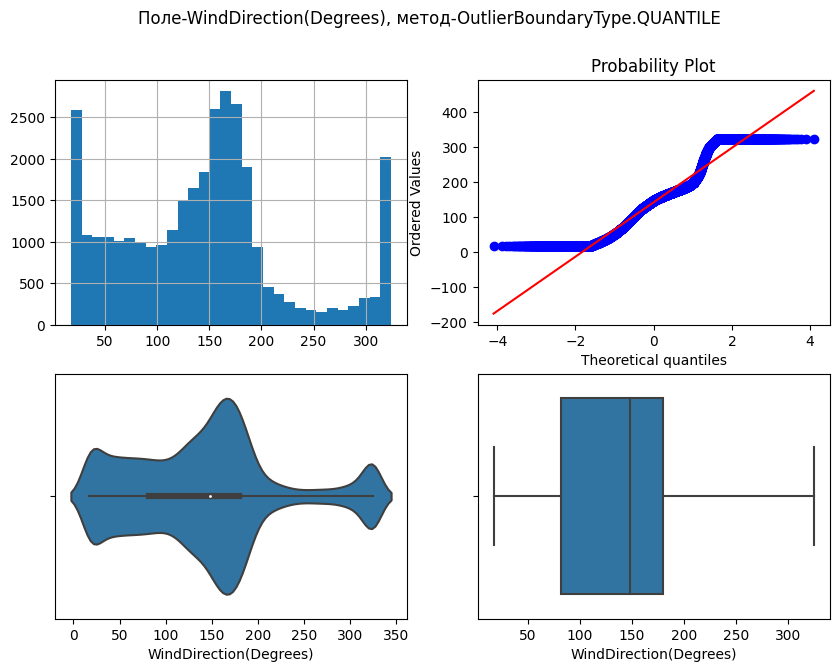

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


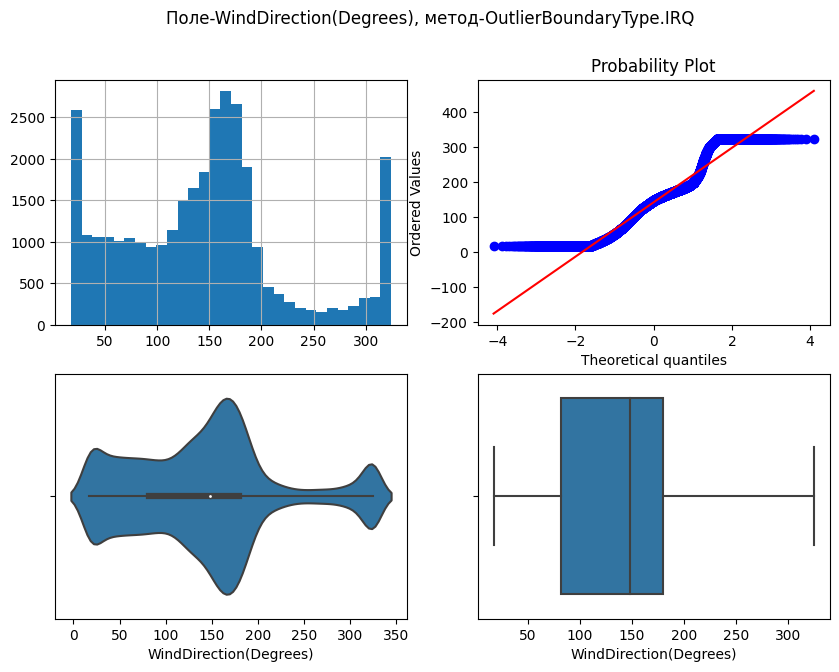

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


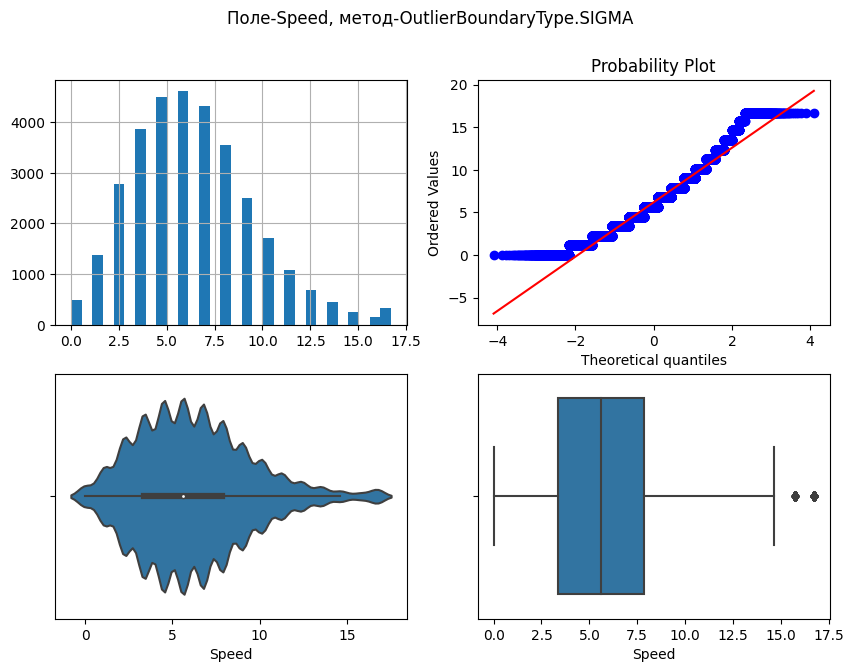

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


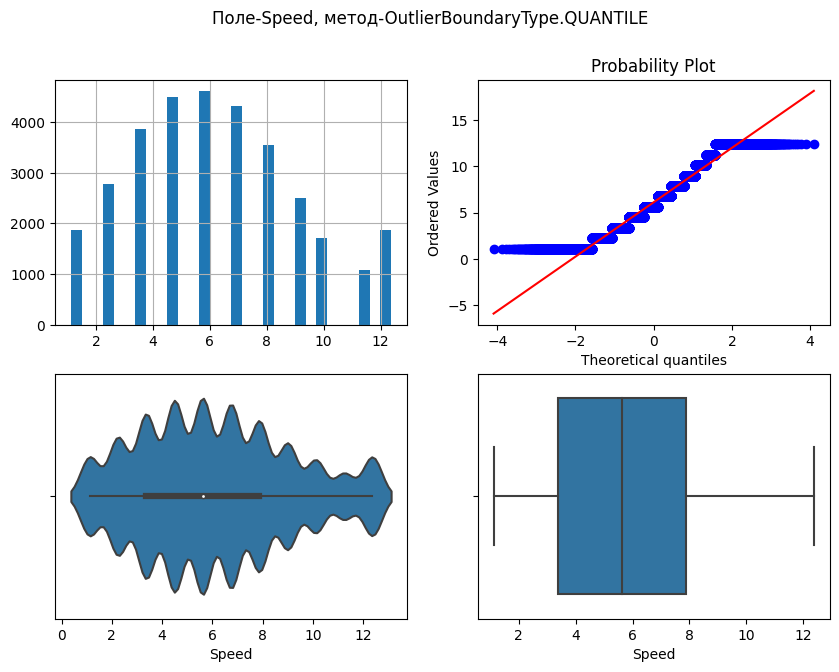

<ipython-input-35-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


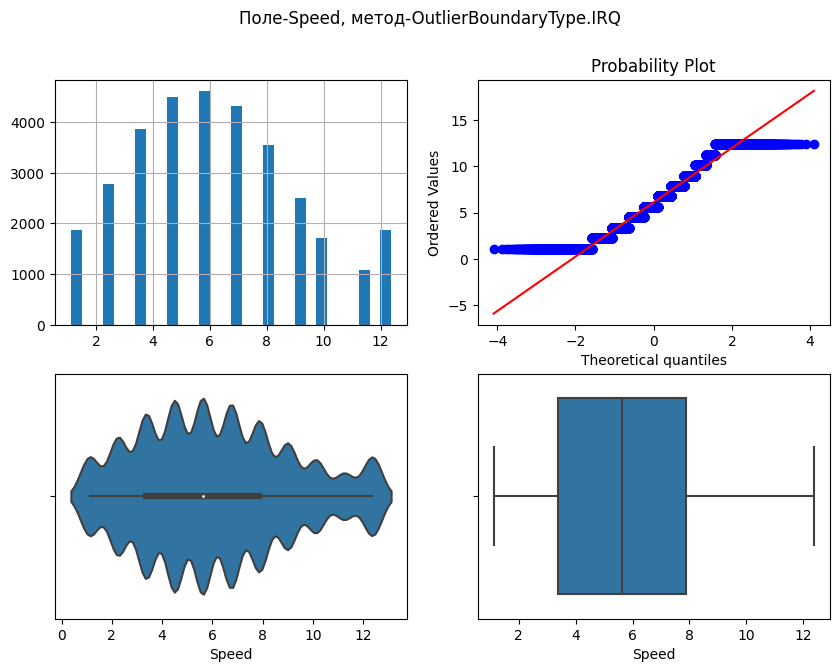

In [ ]:
for col in x_col_list:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary,
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

## Обработка нестандартного признака

### Обработка даты и времени

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00


In [ ]:
# Сконвертируем дату и время в нужный формат
data['dt'] = pd.to_datetime(data['Data'], format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,dt
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,2016-09-29
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,2016-09-29
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,2016-09-29
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,2016-09-29
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,2016-09-29


In [ ]:
data.dtypes

UNIXTime                           int64
Data                              object
Time                              object
Radiation                        float64
Temperature                      float64
Pressure                         float64
Humidity                         float64
WindDirection(Degrees)           float64
Speed                            float64
TimeSunRise                       object
TimeSunSet                        object
dt                        datetime64[ns]
dtype: object

In [ ]:
data['dtTime'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['dtTimeSunRise'] = pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S')
data['dtTimeSunSet'] = pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S')

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,dt,dtTime,dtTimeSunRise,dtTimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,2016-09-29,1900-01-01 23:55:26,1900-01-01 06:13:00,1900-01-01 18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,2016-09-29,1900-01-01 23:50:23,1900-01-01 06:13:00,1900-01-01 18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,2016-09-29,1900-01-01 23:45:26,1900-01-01 06:13:00,1900-01-01 18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,2016-09-29,1900-01-01 23:40:21,1900-01-01 06:13:00,1900-01-01 18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,2016-09-29,1900-01-01 23:35:24,1900-01-01 06:13:00,1900-01-01 18:13:00


In [ ]:
data.dtypes

UNIXTime                           int64
Data                              object
Time                              object
Radiation                        float64
Temperature                      float64
Pressure                         float64
Humidity                         float64
WindDirection(Degrees)           float64
Speed                            float64
TimeSunRise                       object
TimeSunSet                        object
dt                        datetime64[ns]
dtTime                    datetime64[ns]
dtTimeSunRise             datetime64[ns]
dtTimeSunSet              datetime64[ns]
dtype: object

In [ ]:
data['dtTime'] = data['Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
data['dtTimeSunRise'] = data['TimeSunRise'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
data['dtTimeSunSet'] = data['TimeSunSet'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,dt,dtTime,dtTimeSunRise,dtTimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,2016-09-29,23:55:26,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,2016-09-29,23:50:23,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,2016-09-29,23:45:26,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,2016-09-29,23:40:21,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,2016-09-29,23:35:24,06:13:00,18:13:00


In [ ]:
data.dtypes

UNIXTime                           int64
Data                              object
Time                              object
Radiation                        float64
Temperature                      float64
Pressure                         float64
Humidity                         float64
WindDirection(Degrees)           float64
Speed                            float64
TimeSunRise                       object
TimeSunSet                        object
dt                        datetime64[ns]
dtTime                            object
dtTimeSunRise                     object
dtTimeSunSet                      object
dtype: object

## Отбор признаков

### Методы фильтрации (filter methods)

Методы, основанные на статистических характеристиках (univariate feature selection)

In [ ]:
data_X = X_ALL
data_y = data['Radiation']

Text(0, 0.5, 'Взаимная информация')

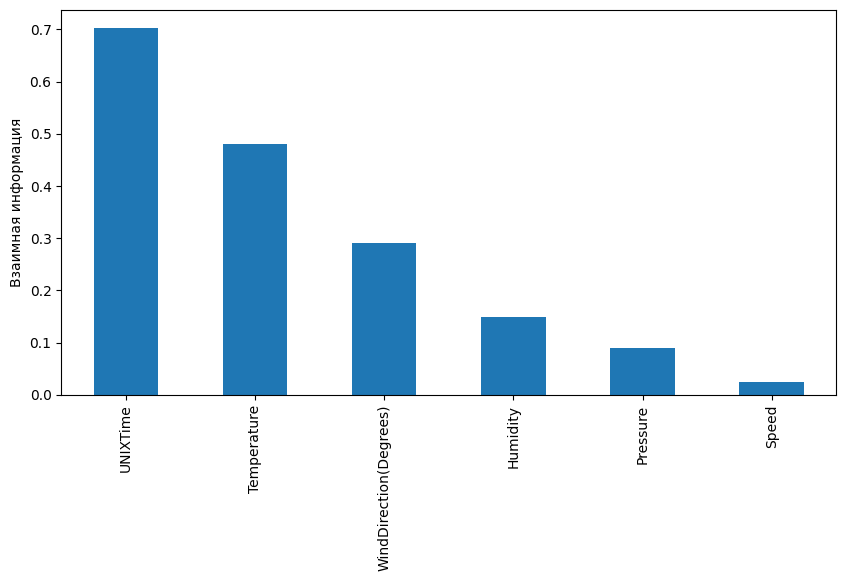

In [ ]:
mi = mutual_info_regression(data_X, data_y)
mi = pd.Series(mi)
mi.index = data_X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(data_X, data_y)

list(zip(data_X.columns, sel_mi.get_support()))

[('UNIXTime', True),
 ('Temperature', True),
 ('Pressure', True),
 ('Humidity', True),
 ('WindDirection(Degrees)', True),
 ('Speed', False)]

In [ ]:
data_X.columns[sel_mi.get_support()]

Index(['UNIXTime', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)'],
      dtype='object')

### Методы обертывания (wrapper methods)

Алгоритмы полного перебора

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='neg_mean_squared_error',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_X, data_y)

print('Best neg_mean_squared_error score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 50/50

Best neg_mean_squared_error score: -47676.81
Best subset (indices): (1, 3, 4, 5)
Best subset (corresponding names): ('Temperature', 'Humidity', 'WindDirection(Degrees)', 'Speed')


### Методы вложений (embedded methods)

Использование моделей на основе решающего дерева

Задача регрессии

In [ ]:
def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

In [ ]:
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()
dtr1.fit(data_X, data_y)
rfr1.fit(data_X, data_y)
gbr1.fit(data_X, data_y)

# Важность признаков
dtr1.feature_importances_, sum(dtr1.feature_importances_)

(array([0.21640601, 0.6119558 , 0.04244915, 0.0700287 , 0.03999824,
        0.0191621 ]),
 1.0)

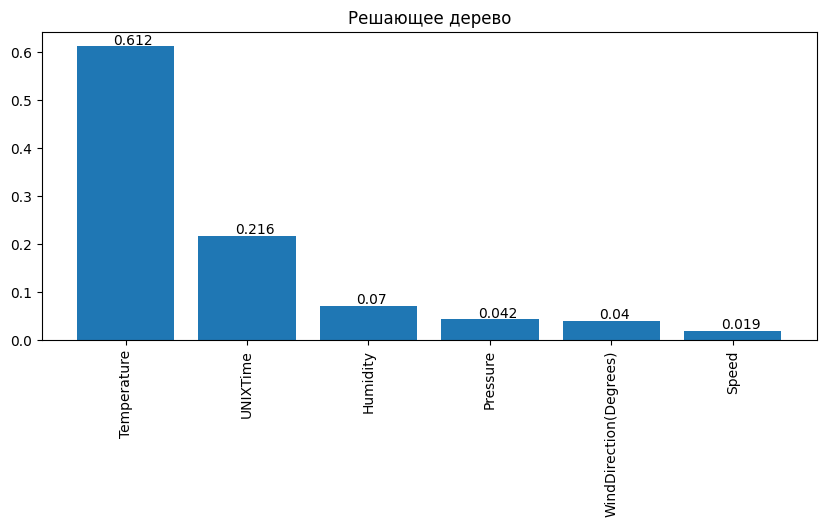

In [ ]:
_,_=draw_feature_importances(dtr1, data_X, 'Решающее дерево', figsize=(10,4))